In [130]:
import pandas as pd
import numpy as np

In [9]:
url="https://data.cityofnewyork.us/resource/8h5j-fqxa.csv?borough=4&block=528&lot=50"

In [12]:
df=pd.read_table(url,sep=',')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 183
Data columns (total 14 columns):
DOCUMENT ID            184 non-null object
RECORD TYPE            184 non-null object
BOROUGH                184 non-null int64
BLOCK                  184 non-null int64
LOT                    184 non-null int64
EASEMENT               184 non-null object
PARTIAL LOT            184 non-null object
AIR RIGHTS             184 non-null object
SUBTERRANEAN RIGHTS    184 non-null object
PROPERTY TYPE          184 non-null object
STREET NUMBER          176 non-null object
STREET NAME            176 non-null object
UNIT                   165 non-null object
GOOD THROUGH DATE      184 non-null object
dtypes: int64(3), object(11)
memory usage: 13.7+ KB


In [46]:
docids = df['DOCUMENT ID']
urlbase="https://data.cityofnewyork.us/resource/bnx9-e6tj.csv?$where=document_id='"
l = len(docids)
n = l // 100 
masterlist = [] 
for i in range(n+1):
    if i < n:
        url = urlbase + "'%20or%20document_id='".join(docids[i*100:(i+1)*100]) + "'"
        #print url 
        masterlist.append(pd.read_table(url,sep=','))
    else:
        url=urlbase + "'%20or%20document_id='".join(docids[i*100:l]) + "'"
        #print url
        masterlist.append(pd.read_table(url,sep=',')) 
    


https://data.cityofnewyork.us/resource/bnx9-e6tj.csv?$where=document_id='2011012100554001'%20or%20document_id='2013112100798001'%20or%20document_id='2010090101085001'%20or%20document_id='FT_4320004196832'%20or%20document_id='2012072701175001'%20or%20document_id='2004060301191001'%20or%20document_id='2010012600728001'%20or%20document_id='FT_4200002384220'%20or%20document_id='2013080100371001'%20or%20document_id='2014101501609001'%20or%20document_id='2013022801477001'%20or%20document_id='2005111500243001'%20or%20document_id='2015030600469001'%20or%20document_id='2011110700905001'%20or%20document_id='2007120600707001'%20or%20document_id='2011051100342001'%20or%20document_id='2010070600945001'%20or%20document_id='2013010301805001'%20or%20document_id='2006011201300001'%20or%20document_id='2007061901447001'%20or%20document_id='2006051901682001'%20or%20document_id='2008120301271001'%20or%20document_id='2014110300958001'%20or%20document_id='2014022801011001'%20or%20document_id='201104060105000

[         DOCUMENT ID RECORD TYPE          CRFN  BOROUGH DOC. TYPE   DOC. DATE  \
 0   2013032801109001           A  2.013000e+12        1  RPTT&RET  04/01/2013   
 1   2007122100640001           A  2.008000e+12        1  RPTT&RET  12/28/2007   
 2   2013080100371001           A  2.013000e+12        1  RPTT&RET  07/25/2013   
 3   2013010301805001           A  2.013000e+12        1  RPTT&RET  01/16/2013   
 4   2004101901070001           A  2.004001e+12        4  RPTT&RET  10/08/2004   
 5   2014032500337002           A  2.014000e+12        1      TL&R  03/19/2014   
 6   2013071501579001           A  2.013000e+12        2  RPTT&RET  07/16/2013   
 7   2008021500280001           A  2.008000e+12        4  RPTT&RET  02/14/2008   
 8   2010070600945001           A  2.010000e+12        4  RPTT&RET  06/30/2010   
 9   2007083100664001           A  2.007001e+12        2  RPTT&RET  08/29/2007   
 10  2004022300182002           A  2.004000e+12        4  RPTT&RET  02/17/2004   
 11  20080805012

In [55]:
masters = pd.concat(masterlist)
masters.head()

,DOCUMENT ID,RECORD TYPE,CRFN,BOROUGH,DOC. TYPE,DOC. DATE,DOC. AMOUNT,RECORDED / FILED,MODIFIED DATE,REEL YEAR,REEL NBR,REEL PAGE,% TRANSFERRED,GOOD THROUGH DATE
0,2013032801109001,A,2.013000e+12,1,RPTT&RET,04/01/2013,190000,04/25/2013,04/25/2013,0,0,0,100,07/31/2015
1,2007122100640001,A,2.008000e+12,1,RPTT&RET,12/28/2007,278000,01/31/2008,01/31/2008,0,0,0,100,07/31/2015
2,2013080100371001,A,2.013000e+12,1,RPTT&RET,07/25/2013,298000,08/26/2013,08/26/2013,0,0,0,100,07/31/2015
3,2013010301805001,A,2.013000e+12,1,RPTT&RET,01/16/2013,375000,03/15/2013,03/15/2013,0,0,0,100,07/31/2015
4,2004101901070001,A,2.004001e+12,4,RPTT&RET,10/08/2004,243000,11/08/2004,11/08/2004,0,0,0,100,07/31/2015


In [120]:
mergeddf = pd.merge(df,masters,on=['DOCUMENT ID'])
mergeddf.head()

,DOCUMENT ID,RECORD TYPE_x,BOROUGH_x,BLOCK,LOT,EASEMENT,PARTIAL LOT,AIR RIGHTS,SUBTERRANEAN RIGHTS,PROPERTY TYPE,...,DOC. TYPE,DOC. DATE,DOC. AMOUNT,RECORDED / FILED,MODIFIED DATE,REEL YEAR,REEL NBR,REEL PAGE,% TRANSFERRED,GOOD THROUGH DATE_y
0,2011012100554001,L,4,528,50,N,E,N,N,SP,...,RPTT&RET,01/24/2011,300000,02/08/2011,02/08/2011,0,0,0,100,07/31/2015
1,2013112100798001,L,4,528,50,N,E,N,N,SP,...,RPTT&RET,11/14/2013,325000,12/03/2013,12/03/2013,0,0,0,100,07/31/2015
2,2010090101085001,L,4,528,50,N,E,N,N,SP,...,RPTT&RET,09/01/2010,332500,09/13/2010,09/13/2010,0,0,0,100,07/31/2015
3,FT_4320004196832,L,4,528,50,N,E,N,N,PA,...,REL,NaN,0,03/22/1994,03/22/1994,1994,3824,166,0,07/31/2015
4,2012072701175001,L,4,528,50,N,E,N,N,SP,...,RPTT&RET,07/17/2012,315000,08/07/2012,08/07/2012,0,0,0,100,07/31/2015


In [122]:
#clean up column names
mergeddf.columns = mergeddf.columns.str.replace(' ','')
mergeddf.columns = mergeddf.columns.str.replace('.','')
mergeddf.columns = mergeddf.columns.str.lower()
mergeddf.columns

Index([u'documentid', u'recordtype_x', u'borough_x', u'block', u'lot',
       u'easement', u'partiallot', u'airrights', u'subterraneanrights',
       u'propertytype', u'streetnumber', u'streetname', u'unit',
       u'goodthroughdate_x', u'recordtype_y', u'crfn', u'borough_y',
       u'doctype', u'docdate', u'docamount', u'recorded/filed',
       u'modifieddate', u'reelyear', u'reelnbr', u'reelpage', u'%transferred',
       u'goodthroughdate_y'],
      dtype='object')

In [123]:
#check data types
mergeddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 183
Data columns (total 27 columns):
documentid            184 non-null object
recordtype_x          184 non-null object
borough_x             184 non-null int64
block                 184 non-null int64
lot                   184 non-null int64
easement              184 non-null object
partiallot            184 non-null object
airrights             184 non-null object
subterraneanrights    184 non-null object
propertytype          184 non-null object
streetnumber          176 non-null object
streetname            176 non-null object
unit                  165 non-null object
goodthroughdate_x     184 non-null object
recordtype_y          184 non-null object
crfn                  168 non-null float64
borough_y             184 non-null int64
doctype               184 non-null object
docdate               169 non-null object
docamount             184 non-null int64
recorded/filed        184 non-null object
modifieddate     

In [126]:
#fix the date field
from datetime import datetime
mergeddf['date'] = [ datetime.strptime(date_string, '%m/%d/%Y') for date_string in mergeddf['docdate'] ]

TypeError: must be string, not float

In [137]:
mergeddf[mergeddf.docdate.isnull()]

,documentid,recordtype_x,borough_x,block,lot,easement,partiallot,airrights,subterraneanrights,propertytype,...,doctype,docdate,docamount,recorded/filed,modifieddate,reelyear,reelnbr,reelpage,%transferred,goodthroughdate_y
3,FT_4320004196832,L,4,528,50,N,E,N,N,PA,...,REL,NaN,0,03/22/1994,03/22/1994,1994,3824,166,0,07/31/2015
7,FT_4200002384220,L,4,528,50,N,E,N,N,PA,...,AGMT,NaN,0,10/16/1987,10/16/1987,1987,2474,633,0,07/31/2015
50,FT_4660002623966,L,4,528,50,N,E,N,N,PA,...,SAT,NaN,0,12/20/1989,12/20/1989,1989,2924,430,0,07/31/2015
59,FT_4440002601544,L,4,528,50,N,E,N,N,PA,...,MTGE,NaN,1000000,10/04/1989,10/04/1989,1989,2882,1472,0,07/31/2015
71,FT_4530004196853,L,4,528,50,N,E,N,N,PA,...,ASST,NaN,0,03/22/1994,03/22/1994,1994,3824,211,0,07/31/2015
78,FT_4360004196836,L,4,528,50,N,E,N,N,PA,...,MTGE,NaN,850000,03/22/1994,03/22/1994,1994,3824,170,0,07/31/2015
79,FT_4030005607603,L,4,528,50,N,E,N,N,PA,...,SMIS,NaN,0,05/13/1997,05/13/1997,1997,4587,2247,0,07/31/2015
111,FT_4190002384219,L,4,528,50,N,E,N,N,PA,...,AGMT,NaN,0,10/16/1987,10/16/1987,1987,2474,630,0,07/31/2015
117,FT_4430002601543,L,4,528,50,N,E,N,N,PA,...,ASST,NaN,0,10/04/1989,10/04/1989,1989,2882,1464,0,07/31/2015
118,FT_4480004196848,L,4,528,50,N,E,N,N,PA,...,AGMT,NaN,0,03/22/1994,03/22/1994,1994,3824,176,0,07/31/2015


In [60]:
%matplotlib inline

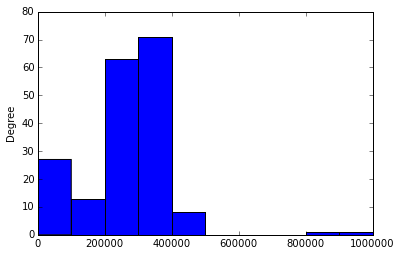

In [78]:
#mergeddf.plot(x="DOC. DATE", y=u'DOC. AMOUNT', kind='scatter')
mergeddf["DOC. AMOUNT"].plot(kind='hist')

In [79]:
#what are those high outliers?
mergeddf[mergeddf["DOC. AMOUNT"]>600000]
#mortages for the coop as a whole.  Let's look at document types and limit to actual sales 

,DOCUMENT ID,RECORD TYPE_x,BOROUGH_x,BLOCK,LOT,EASEMENT,PARTIAL LOT,AIR RIGHTS,SUBTERRANEAN RIGHTS,PROPERTY TYPE,...,DOC. TYPE,DOC. DATE,DOC. AMOUNT,RECORDED / FILED,MODIFIED DATE,REEL YEAR,REEL NBR,REEL PAGE,% TRANSFERRED,GOOD THROUGH DATE_y
59,FT_4440002601544,L,4,528,50,N,E,N,N,PA,...,MTGE,NaN,1000000,10/04/1989,10/04/1989,1989,2882,1472,0,07/31/2015
78,FT_4360004196836,L,4,528,50,N,E,N,N,PA,...,MTGE,NaN,850000,03/22/1994,03/22/1994,1994,3824,170,0,07/31/2015


In [81]:
mergeddf["DOC. TYPE"].value_counts()

RPTT&RET    149
RPTT         10
ASST          5
MTGE          4
AGMT          4
PAT           4
SAT           2
RETT          2
CTOR          1
REL           1
TL&R          1
SMIS          1
dtype: int64

In [83]:
mergeddf.columns = mergeddf.columns.str.replace(' ','')
mergeddf.columns = mergeddf.columns.str.replace('.','')
mergeddf.columns

Index([u'DOCUMENTID', u'RECORDTYPE_x', u'BOROUGH_x', u'BLOCK', u'LOT',
       u'EASEMENT', u'PARTIALLOT', u'AIRRIGHTS', u'SUBTERRANEANRIGHTS',
       u'PROPERTYTYPE', u'STREETNUMBER', u'STREETNAME', u'UNIT',
       u'GOODTHROUGHDATE_x', u'RECORDTYPE_y', u'CRFN', u'BOROUGH_y',
       u'DOCTYPE', u'DOCDATE', u'DOCAMOUNT', u'RECORDED/FILED',
       u'MODIFIEDDATE', u'REELYEAR', u'REELNBR', u'REELPAGE', u'%TRANSFERRED',
       u'GOODTHROUGHDATE_y'],
      dtype='object')

In [90]:
sales=mergeddf[mergeddf.DOCTYPE.str.startswith('RPTT')]

In [92]:
sales.head()

,DOCUMENTID,RECORDTYPE_x,BOROUGH_x,BLOCK,LOT,EASEMENT,PARTIALLOT,AIRRIGHTS,SUBTERRANEANRIGHTS,PROPERTYTYPE,...,DOCTYPE,DOCDATE,DOCAMOUNT,RECORDED/FILED,MODIFIEDDATE,REELYEAR,REELNBR,REELPAGE,%TRANSFERRED,GOODTHROUGHDATE_y
0,2011012100554001,L,4,528,50,N,E,N,N,SP,...,RPTT&RET,01/24/2011,300000,02/08/2011,02/08/2011,0,0,0,100,07/31/2015
1,2013112100798001,L,4,528,50,N,E,N,N,SP,...,RPTT&RET,11/14/2013,325000,12/03/2013,12/03/2013,0,0,0,100,07/31/2015
2,2010090101085001,L,4,528,50,N,E,N,N,SP,...,RPTT&RET,09/01/2010,332500,09/13/2010,09/13/2010,0,0,0,100,07/31/2015
4,2012072701175001,L,4,528,50,N,E,N,N,SP,...,RPTT&RET,07/17/2012,315000,08/07/2012,08/07/2012,0,0,0,100,07/31/2015
6,2010012600728001,L,4,528,50,N,E,N,N,SP,...,RPTT&RET,01/28/2010,325000,02/18/2010,02/18/2010,0,0,0,100,07/31/2015


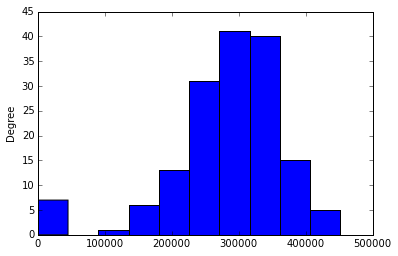

In [94]:
sales.DOCAMOUNT.plot(kind='hist')

In [95]:
sales=sales[sales.DOCAMOUNT>0]

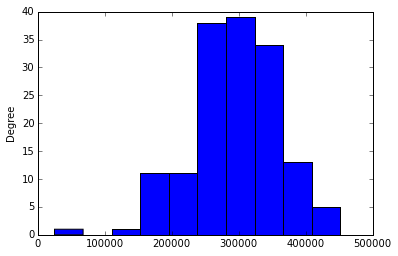

In [96]:
sales.DOCAMOUNT.plot(kind='hist')

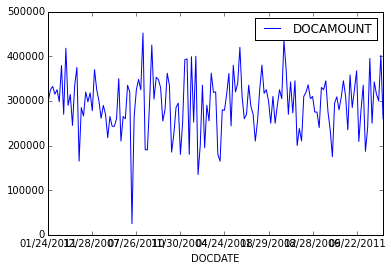

In [99]:
sales.plot(x='DOCDATE',y='DOCAMOUNT')

In [112]:
sales.DOCDATE#.astype('datetime64')

0      01/24/2011
1      11/14/2013
2      09/01/2010
4      07/17/2012
6      01/28/2010
8      07/25/2013
10     02/28/2013
11     11/10/2005
12     03/05/2015
13     11/08/2011
14     12/05/2007
15     05/04/2011
16     06/30/2010
17     01/16/2013
18     06/21/2004
19     06/05/2007
20     05/19/2006
21     12/02/2008
23     02/06/2014
24     04/07/2011
25     12/28/2007
26     02/14/2008
27     09/02/2009
28     03/07/2014
29     01/17/2013
30     04/25/2008
31     10/21/2005
32     05/16/2005
33     04/24/2012
34     02/10/2005
          ...    
150    07/14/2006
151    07/27/2009
152    09/08/2005
153    10/21/2009
154    01/23/2012
157    08/10/2005
158    09/23/2004
159    12/03/2012
160    06/24/2009
161    04/29/2008
162    01/14/2014
163    04/30/2014
165    03/28/2012
166    08/29/2011
167    08/14/2008
168    12/07/2011
169    03/25/2014
170    06/22/2011
171    07/21/2005
172    10/11/2006
173    11/28/2006
175    11/09/2004
176    04/08/2005
177    10/08/2008
178    12/

In [ ]:
from datetime import datetime
df['date_field'] = [ datetime.strptime(date_string, '%m/%d/%Y') for date_string in df['date_field'] ]